# Imports

In [3]:
import pandas as pd 
import numpy as np

### Base com atributos numéricos

In [9]:
# Base tirada de https://archive.ics.uci.edu/ml/datasets/Balance+Scale

balance = pd.read_csv('databases/balance-scale.csv',
                      header=None, 
                      names=["Pendência", "Peso_E", "Distância_E", "Peso_D", "Distância_D"])

# Substituindo a string de pendência para valores compreenciveis
# balance = balance.replace({
#     "B": "Balanceado", 
#     "L": "Esquerda", 
#     "R": "Direita", 
# })

balance

,Pendência,Peso_E,Distância_E,Peso_D,Distância_D
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [5]:
balance.describe()

,Peso_E,Distância_E,Peso_D,Distância_D
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [6]:
balance.dtypes

Pendência      object
Peso_E          int64
Distância_E     int64
Peso_D          int64
Distância_D     int64
dtype: object

In [8]:
# balance = pd.get_dummies(balance, 
#                          columns=["Pendência"], 
#                          prefix=["Classe"])
# balance

In [10]:
from sklearn.preprocessing import OrdinalEncoder
atributos = [
                         "Peso_E", "Distância_E", "Peso_D", "Distância_D"
                      ]
enc = OrdinalEncoder()
enc.fit(balance[atributos])
balance[atributos] = enc.transform(balance[atributos])
balance

,Pendência,Peso_E,Distância_E,Peso_D,Distância_D
0,B,0.0,0.0,0.0,0.0
1,R,0.0,0.0,0.0,1.0
2,R,0.0,0.0,0.0,2.0
3,R,0.0,0.0,0.0,3.0
4,R,0.0,0.0,0.0,4.0
...,...,...,...,...,...
620,L,4.0,4.0,4.0,0.0
621,L,4.0,4.0,4.0,1.0
622,L,4.0,4.0,4.0,2.0
623,L,4.0,4.0,4.0,3.0


In [11]:
from sklearn.preprocessing import StandardScaler

balance[atributos] = StandardScaler().fit_transform(balance[atributos])
#balance = pd.DataFrame(balance)

balance


,Pendência,Peso_E,Distância_E,Peso_D,Distância_D
0,B,-1.414214,-1.414214,-1.414214,-1.414214
1,R,-1.414214,-1.414214,-1.414214,-0.707107
2,R,-1.414214,-1.414214,-1.414214,0.000000
3,R,-1.414214,-1.414214,-1.414214,0.707107
4,R,-1.414214,-1.414214,-1.414214,1.414214
...,...,...,...,...,...
620,L,1.414214,1.414214,1.414214,-1.414214
621,L,1.414214,1.414214,1.414214,-0.707107
622,L,1.414214,1.414214,1.414214,0.000000
623,L,1.414214,1.414214,1.414214,0.707107


## Clusterizando a Balança
##### Selecionando o X e y

In [12]:
# Selecionando o X e o y


# X = jogo_da_velha[atributos]
X = balance.iloc[:, 1:].values # Atributos do Data Frame do Pandas
y = balance.iloc[:, :1].values # Classes do Data Frame do Pandas

y = np.squeeze(y) # Converter em um unico Array quando usar o dataFrame do Pandas

y_unique = np.unique(y)

# Atualizando o eixo Y
for i in range(len(y_unique)):
    y = [i if y_unique[i] == e else e for e in y]
y = np.array(y)

y_unique # Valores unicos de classes

array(['B', 'L', 'R'], dtype=object)

##### Exemplos de Algoritmos para cálculos de distâncias

In [13]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity


eucl = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'euclidean')

manh = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'manhattan')

ass_cos = cosine_similarity(X[0].reshape(1, -1), X[1].reshape(1, -1))

print("Euclidiano: ", eucl)
print("Manhattan: ", manh)
print("Assimilaridade do Cosseno: ", ass_cos)

Euclidiano:  [[0.70710678]]
Manhattan:  [[0.70710678]]
Assimilaridade do Cosseno:  [[0.97072534]]


##### PCA

Projecting 4-dimensional data to 2D


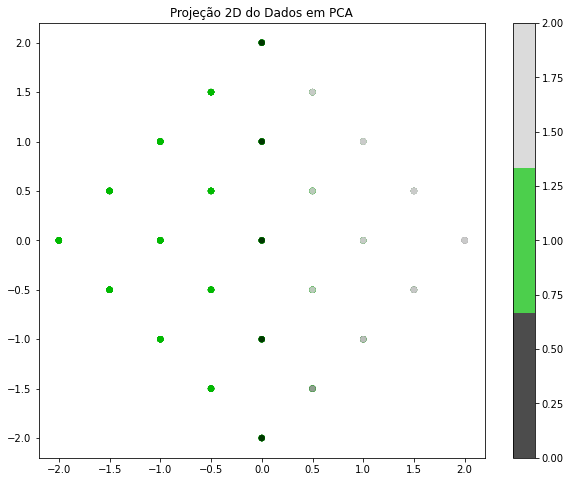

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

def plot_g(pyplot, title, colors, n_classes):
    pyplot.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, 
             edgecolor='none', alpha=0.7, s=40,
             cmap=plt.cm.get_cmap('nipy_spectral', n_classes)
           )
    pyplot.colorbar()
    pyplot.title(title)

plt.figure(figsize=(10, 8)) # Tamanho da Figura
plot_g(plt, 'Projeção 2D do Dados em PCA', y, len(y_unique))
plt.show()


##### KMeans com a base original e com o PCA

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(y_unique)).fit(X)
labels = kmeans.labels_

kmeans_PCA = KMeans(n_clusters=len(y_unique)).fit(X_reduced)
labels_PCA = kmeans_PCA.labels_


##### Plotando os Gráficos 

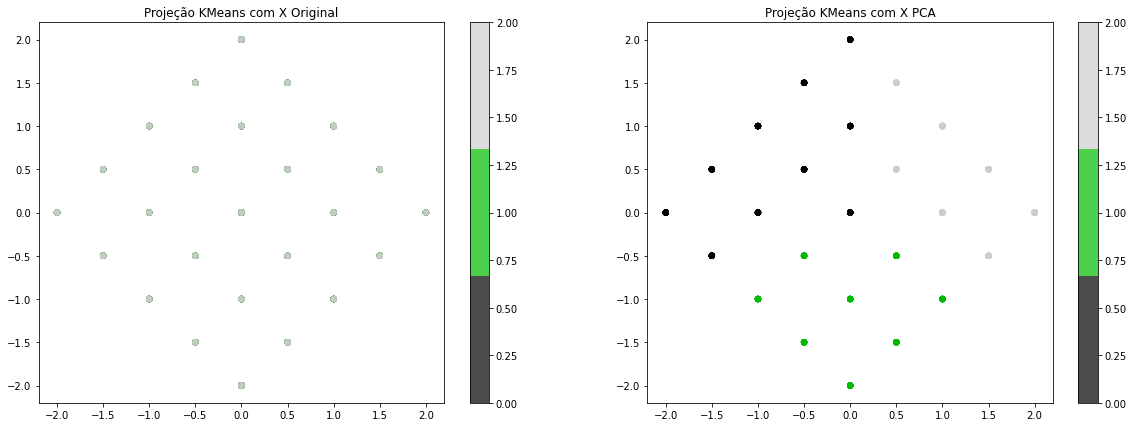

In [16]:

plt.figure(figsize=(10*2, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X Original')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_PCA, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X PCA')

plt.show()

##### Comparando o KMeans, KMeans PCA e o y Original

In [17]:
print("Comparação: ")

unique, counts = np.unique(labels, return_counts=True) # KMeans
print("KMeans X: " , dict(zip(unique, counts)))

unique, counts = np.unique(labels_PCA, return_counts=True) # KMeans PCA
print("KM.. PCA: ", dict(zip(unique, counts)))

unique, counts = np.unique(y, return_counts=True) # Original
print("Original: ", dict(zip(unique, counts)))


Comparação: 
KMeans X:  {0: 250, 1: 175, 2: 200}
KM.. PCA:  {0: 250, 1: 200, 2: 175}
Original:  {0: 49, 1: 288, 2: 288}
